In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ returns tuple (d, pos)
            d is the distance
            If pos == -1 point is below the line, 
            0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)  # distance from the line to point
    return distance

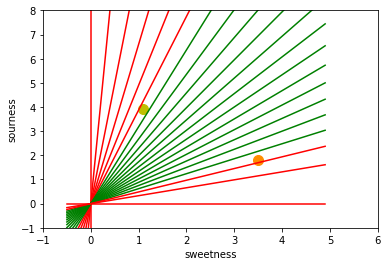

In [6]:
points = [ (3.5, 1.8), (1.1, 3.9) ]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 8])
X = np.arange(-0.5, 5, 0.1)  # generate 55 X-coordinates with difference of 0.1 between two coordinates

colors = ["r", ""] # for the samples

size = 10
for (index, (x, y)) in enumerate(points):  # plots points in the graph
    if index== 0:  # first point
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:  # second point
        ax.plot(x, y, "oy", 
                markersize=size)

step = 0.05 # 
for x in np.arange(0, 1+step, step): # generate 21 slope values = 21 lines to plot
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    #print("x: ", x, "slope: ", slope)
    Y = slope * X  # Y coordinates for a line of a particular slope : total 50 points 
    
    results = []
    for point in points:  # points position to the generated lines
        results.append(dist4line1(*point))
        #print(slope, results)
    if (results[0][1] != results[1][1]):  # if lines lines in between color green else red
        ax.plot(X, Y, "g-")
    else:
        ax.plot(X, Y, "r-")
        

plt.show()

In [7]:
class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.ones(input_length) * 0.5
        else:
            self.weights = weights
        
    @staticmethod
    def unit_step_function(x):
        if x > 0.5:
            return 1
        return 0
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)

In [8]:
p = Perceptron(2, np.array([0.5, 0.5]))

data_in = np.empty((2,))
for in1 in range(2):
    for in2 in range(2):
        data_in = (in1, in2)
        data_out = p(data_in)
        print(data_in, data_out)

(0, 0) 0
(0, 1) 0
(1, 0) 0
(1, 1) 1
